In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [8]:
ESV_df = pd.read_table("../0. Data/resample_merged.grouped.filtered.otu-table.chname.txt")
ESV_df

,ID,UK01A,UK02A,UK03A,UK04A,UK05A,UK06A,UK08A,UK09A,UK10A,...,N52B,N52C,N52I,N52E,GZ100,GZ101,GZ102,GZ103,GZ104,N01A
0,ESV1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
1,ESV2,1350,1663,1724,1603,1613,1696,1734,1084,1045,...,1411,1770,517,1936,0,0,0,0,0,176
2,ESV3,641,1124,1129,985,799,895,727,720,682,...,0,0,0,0,0,0,0,0,0,26
3,ESV4,0,0,0,0,0,0,0,0,0,...,0,32,77,48,0,30,0,0,0,0
4,ESV5,314,507,490,632,633,723,933,800,712,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37854,ESV37855,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37855,ESV37856,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37856,ESV37857,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37857,ESV37858,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# 전체 샘플의 95% 이상에서 abundance=0인 ESV는 제거
esv_abundance = ESV_df.drop(columns=[' ID'])
esv_abundance = esv_abundance.T
esv_abundance


,0,1,2,3,4,5,6,7,8,9,...,37849,37850,37851,37852,37853,37854,37855,37856,37857,37858
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [20]:
zero_rate = (esv_abundance == 0).sum() / esv_abundance.shape[0]
selected_cols = zero_rate[zero_rate < 0.95].index
filtered_esv = esv_abundance[selected_cols]
filtered_esv

,0,1,2,3,4,5,6,7,8,9,...,35191,35192,35193,35194,35195,35197,35201,35207,35208,35218
UK01A,0,1350,641,0,314,592,1375,0,92,56,...,0,0,0,0,0,0,0,0,0,0
UK02A,0,1663,1124,0,507,751,2341,0,131,86,...,0,0,0,0,0,0,0,0,0,0
UK03A,0,1724,1129,0,490,920,2075,0,153,97,...,0,0,0,0,0,0,0,0,0,0
UK04A,0,1603,985,0,632,690,2665,0,146,81,...,0,0,0,0,0,0,0,0,0,0
UK05A,0,1613,799,0,633,873,2840,0,138,138,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,0,0,0,30,0,0,0,0,9,180,...,0,0,0,0,0,0,0,0,0,0
GZ102,0,0,0,0,0,0,0,0,33,157,...,0,0,0,0,0,0,0,0,0,0
GZ103,0,0,0,0,0,0,0,0,23,74,...,0,0,0,0,0,0,0,0,0,0
GZ104,0,0,0,0,0,0,0,0,0,90,...,0,0,0,0,0,0,0,0,0,0


In [29]:
from sklearn.decomposition import TruncatedSVD


# Truncated SVD: 차원 축소 (예: 200차원으로)
svd = TruncatedSVD(n_components=200, random_state=1004)
X_svd = svd.fit_transform(filtered_esv)


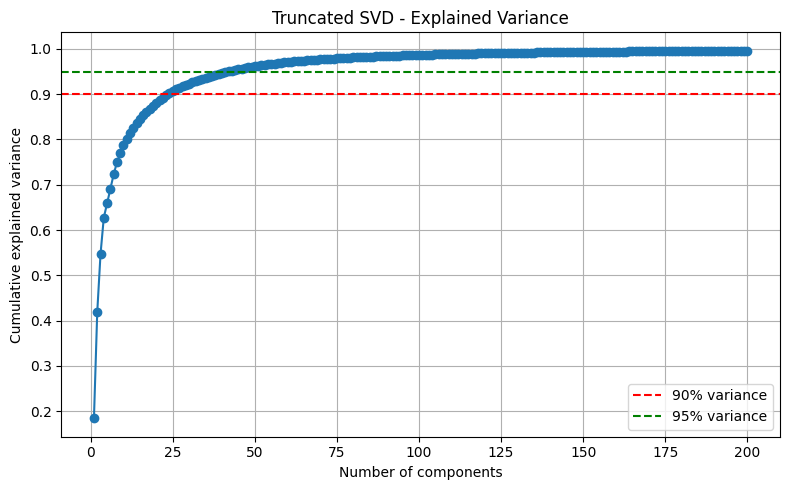

In [30]:
# 각 성분의 설명 분산 비율
explained_var_ratio = svd.explained_variance_ratio_

# 누적 설명 분산
cumulative_explained = np.cumsum(explained_var_ratio)

# 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained) + 1), cumulative_explained, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% variance')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Truncated SVD - Explained Variance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

25 차원으로 줄이기

In [33]:
svd = TruncatedSVD(n_components=25, random_state=1004)
X_svd = svd.fit_transform(filtered_esv)
X_svd.shape


(1243, 25)

In [37]:
# 차원 수 자동 추출
n_components = X_svd.shape[1]

# 컬럼명 생성: SVD_1, SVD_2, ...
svd_columns = [f"SVD_{i+1}" for i in range(n_components)]

# DataFrame으로 변환
X_svd_df = pd.DataFrame(X_svd, index=filtered_esv.index, columns=svd_columns)

# 결과 확인
X_svd_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_16,SVD_17,SVD_18,SVD_19,SVD_20,SVD_21,SVD_22,SVD_23,SVD_24,SVD_25
UK01A,119.512586,30.206870,257.892781,244.542209,1476.170952,-886.607324,877.460751,-748.717582,-459.228337,-222.319253,...,359.310911,-89.069847,35.938781,-80.955725,74.555696,204.643887,-44.432424,-75.566567,-28.152542,-139.776911
UK02A,184.855875,44.575649,394.888152,340.562363,2222.852732,-1271.239892,1316.628486,-1090.680760,-736.107534,-323.143894,...,590.358520,-68.025554,-130.805420,-132.906720,124.226026,291.279505,-43.424642,-21.048832,-121.881068,-222.789861
UK03A,176.093600,47.116199,391.320514,351.139450,2224.944927,-1291.757728,1319.204476,-1115.554144,-725.117653,-331.408948,...,573.401686,-61.099369,-127.653732,-125.362428,118.647594,264.290790,-21.878628,-38.734378,-73.757111,-183.435814
UK04A,188.055920,45.143048,405.899105,335.812563,2275.728090,-1367.835375,1378.402861,-1152.497381,-787.089174,-359.224185,...,598.514885,-104.100813,-251.199593,-164.765123,188.262919,316.618341,-25.531131,10.909645,-205.971329,-358.286225
UK05A,183.131358,45.603622,414.252648,326.158036,2297.905647,-1415.437251,1424.057599,-1168.939447,-812.225139,-382.059660,...,649.802823,-171.539529,-265.680254,-160.743738,161.550729,365.633693,-83.970978,-1.510278,-207.412524,-486.803164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GZ101,494.238896,-38.824252,31.679222,121.701359,359.688041,-1.272138,50.041731,354.381228,781.470751,212.451309,...,-112.166328,58.385814,102.919704,72.808057,-94.706035,-13.287829,140.859177,199.582808,72.440998,-135.446180
GZ102,305.125160,42.983298,41.087944,183.634098,399.361700,15.441426,74.218017,416.102790,817.795276,118.619032,...,-79.298511,51.476070,23.173439,75.400952,-81.106475,-41.925868,50.742185,150.559234,90.515057,-98.718260
GZ103,189.396822,91.082964,48.823397,181.868279,492.019812,38.842927,82.219243,506.441452,1299.410536,137.176615,...,-100.969706,23.984718,-30.219658,158.638139,-247.486326,36.096102,117.122560,71.440781,237.915310,-110.151610
GZ104,156.687353,127.642448,46.379917,193.862037,501.665470,40.127084,70.643125,529.404743,1460.791904,158.691635,...,-103.062245,-62.725783,-0.736163,183.274059,-249.849197,1.157861,190.774279,53.071887,324.480931,-144.010866


In [38]:
X_svd_df.to_csv("../0. Data/ESV_SVD_25D.csv")